 # Normalization - Standardization

Why Transformation of features are Requared ?

1.Linear Regression --- Gradient Descent ---Global Minima

2.Algorithms like KNN, K means, Hierarichal Clustering --- Eucledian Distance  

Every Point has some vectors and Distance 

f1   f2                       (x1,y1) = (24,150)

24   150

21  100

45  67

we do not need  transformation to tree based machine Learni


Deep Learning Techniques(Standardization, Scaling)

1.ANN--->GLobal Minima, Gradient

2.CNN

3.RNN

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles--------- RobustScaler
4. Guassian Transformation

       a.Logarithmic Transformation

       b.Reciprocal Trnasformation

       c.Square Root Transformation

       d.Exponential Trnasformation

       e.Box Cox Transformation

 ## 1.Standardization
 We try to bring all the variables or features to a similar scale. standarization means centering the variable at zero. 
 
 z=(x-x_mean)/std

In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv",usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [3]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler_obj = StandardScaler()
df_scaled=scaler_obj.fit_transform(df)


In [7]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [6]:
type(df_scaled)

numpy.ndarray

In [6]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [7]:
df_scaled

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [8]:
df_scaled["Survived"] = df["Survived"]

In [9]:
df_scaled.head()

,Survived,Pclass,Age,Fare
0,0,0.827377,-0.565736,-0.502445
1,1,-1.566107,0.663861,0.786845
2,1,0.827377,-0.258337,-0.488854
3,1,-1.566107,0.433312,0.420730
4,0,0.827377,0.433312,-0.486337


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

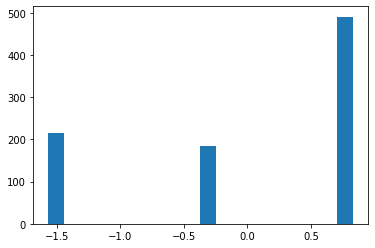

In [13]:
plt.hist(df_scaled.iloc[:,1],bins=20)
plt.show()

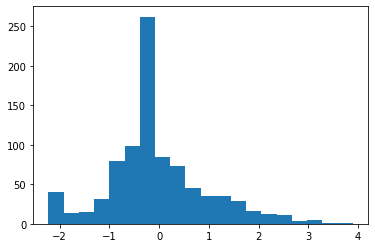

In [14]:
plt.hist(df_scaled.iloc[:,2],bins=20)
plt.show()

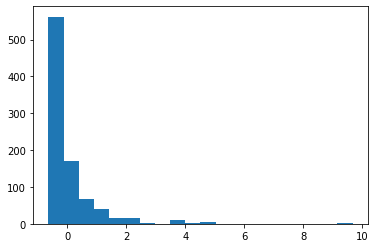

In [15]:
plt.hist(df_scaled.iloc[:,3],bins=20)
plt.show()

## 2.Min Max Scaling (### CNN)---Deep Learning Techniques-- İf distuributions are not Guassian we can use this techniques
Min Max Scaling scales the values between 0 to 1 
WE USE THis TRANFORMATİON İN deep learning model- CNN

X_scaled =X-X.min/(X.max-X.min))

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler_obj = MinMaxScaler()
df_scaled = scaler_obj.fit_transform(df)

In [19]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


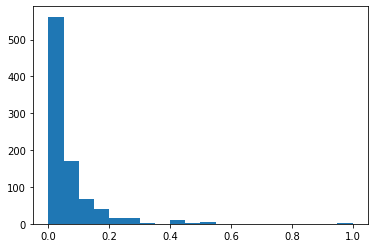

In [20]:
plt.hist(df_scaled.iloc[:,3],bins=20)
plt.show()

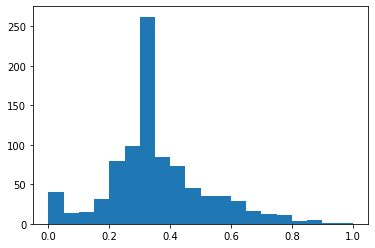

In [21]:
plt.hist(df_scaled.iloc[:,2],bins=20)
plt.show()

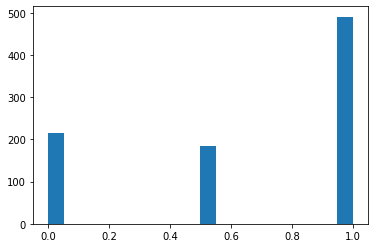

In [22]:
plt.hist(df_scaled.iloc[:,1],bins=20)
plt.show()

## Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [24]:
from sklearn.preprocessing  import RobustScaler
scaler_obj = RobustScaler()
df_scaled =pd.DataFrame(scaler_obj.fit_transform(df),columns=df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


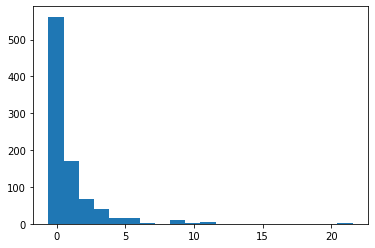

In [25]:
plt.hist(df_scaled.iloc[:,3],bins=20)
plt.show()

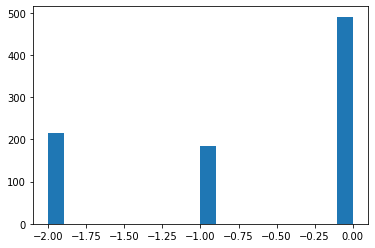

In [26]:
plt.hist(df_scaled.iloc[:,1],bins=20)
plt.show()

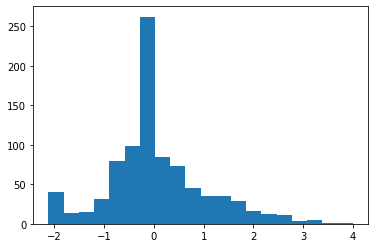

In [27]:
plt.hist(df_scaled.iloc[:,2],bins=20)
plt.show()

### 4.Guassian Transformation 
#### ----Some machine learning algorithms like linear and logistic assume that the features are normally distributed 

-Accuracy

-Performance

a.Logarithmic Transformation

b.Reciprocal Trnasformation

c.Square Root Transformation

d.Exponential Trnasformation (more general, you can any exponent)

e.Box Cox Transformation

In [117]:
df = pd.read_csv("titanic.csv",usecols=["Survived","Age","Fare"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [118]:
#fillna
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [119]:
df["Age"]= df["Age"].fillna(df["Age"].median())

In [120]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [33]:
import scipy.stats as stat
import pylab 

In [34]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

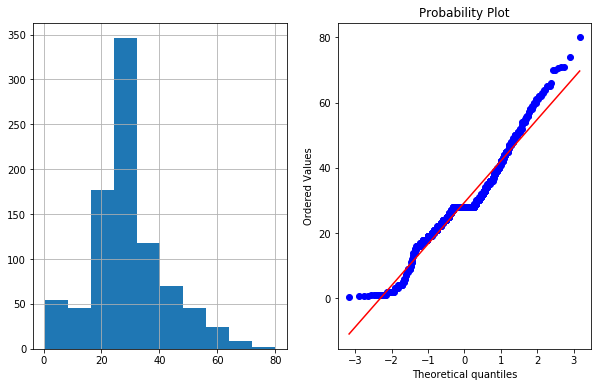

In [37]:
plot_data(df,"Age")

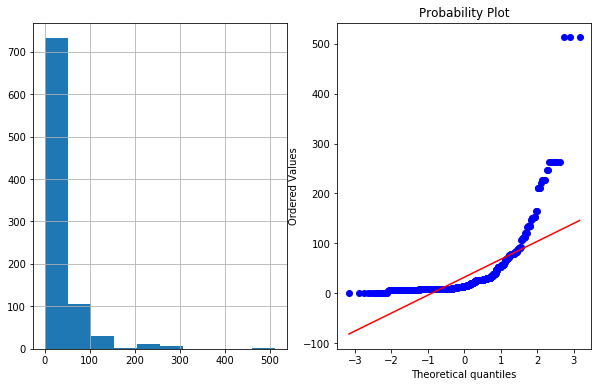

In [38]:
plot_data(df,"Fare")

### a.Logarithmic Transformation

In [49]:
import numpy as np
df["Age_log"] = np.log(df["Age"])
df.head()

,Survived,Age,Fare,Fare_log,Age_log
0,0,22.0,7.2500,1.981001,3.091042
1,1,38.0,71.2833,4.266662,3.637586
2,1,26.0,7.9250,2.070022,3.258097
3,1,35.0,53.1000,3.972177,3.555348
4,0,35.0,8.0500,2.085672,3.555348


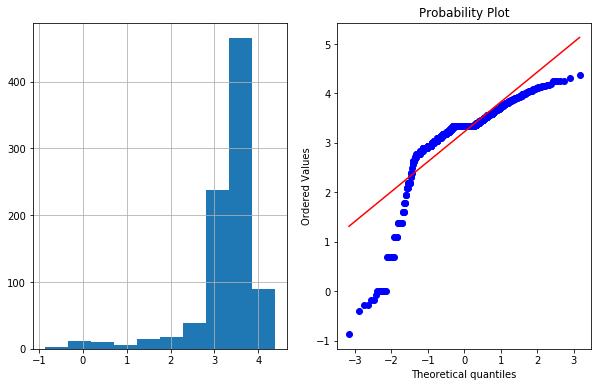

In [50]:
plot_data(df,"Age_log")

In [54]:
import numpy as np
df["Fare_log"] = np.log(df["Fare"].replace(0,1))

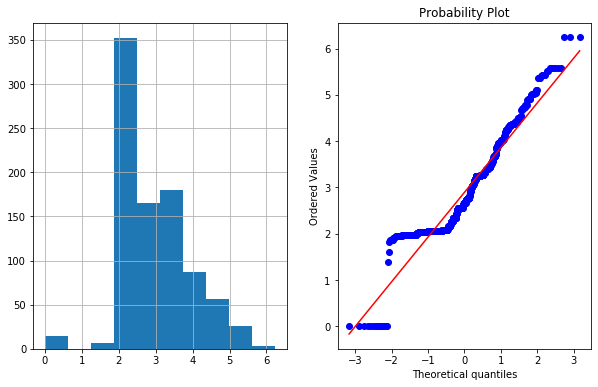

In [55]:
plot_data(df,"Fare_log")

#### b.Reciprocal Transformation

In [66]:
df["Fare_reciprocal"]=1/df["Fare"].replace(0,1)

In [67]:
df.head()

,Survived,Age,Fare,Fare_log,Age_log,Age_reciprocal,Fare_reciprocal
0,0,22.0,7.2500,1.981001,3.091042,0.045455,0.137931
1,1,38.0,71.2833,4.266662,3.637586,0.026316,0.014029
2,1,26.0,7.9250,2.070022,3.258097,0.038462,0.126183
3,1,35.0,53.1000,3.972177,3.555348,0.028571,0.018832
4,0,35.0,8.0500,2.085672,3.555348,0.028571,0.124224


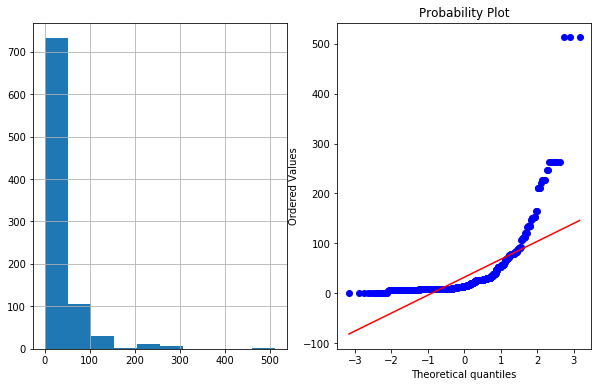

In [68]:
plot_data(df,"Fare")

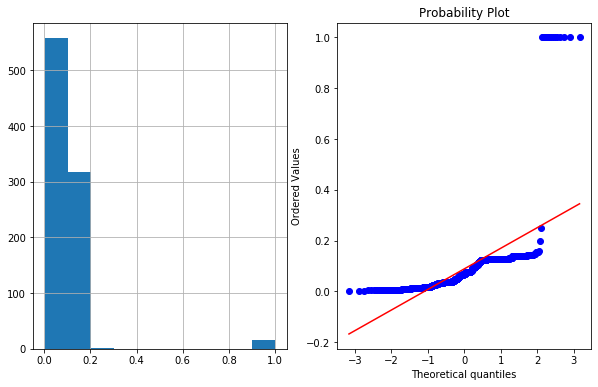

In [69]:
plot_data(df,"Fare_reciprocal")

### c.Square Root Transformation

In [76]:
df["Fare_square"] = df["Fare"]**(1/2)


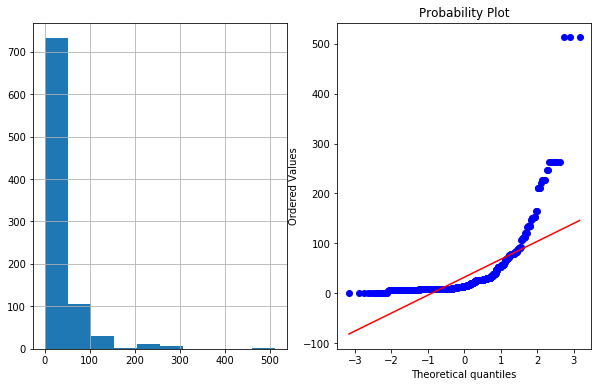

In [77]:
plot_data(df,"Fare")

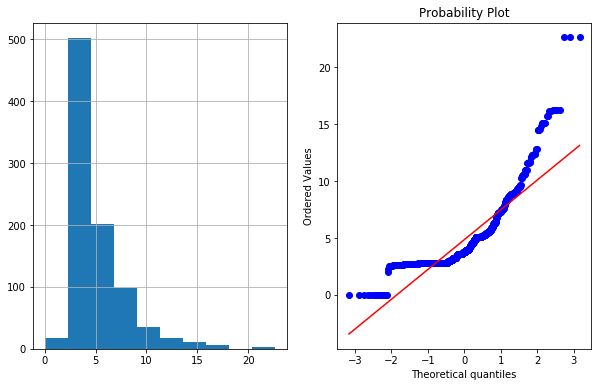

In [78]:
plot_data(df,"Fare_square")

#### c.Exponential Transformation (more general, you can any exponent)

In [84]:
df["Fare_exponential"] = df["Fare"]**(1/1.2)

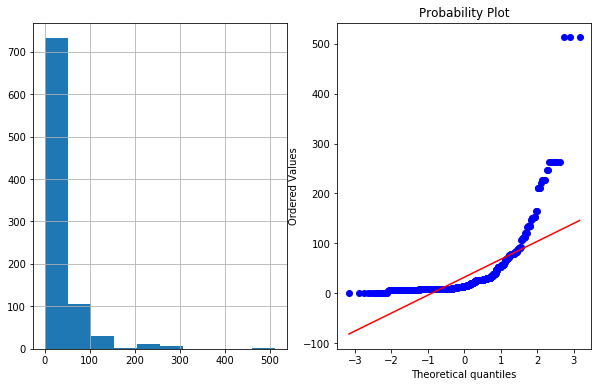

In [85]:
plot_data(df,"Fare")

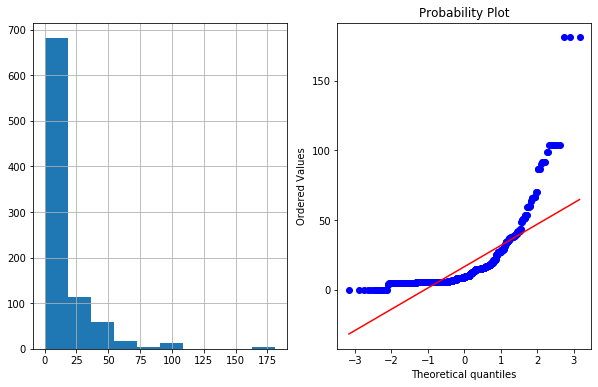

In [87]:
plot_data(df,"Fare_exponential")

In [88]:
df["Age_exponential"] = df["Age"]**(1/1.2)

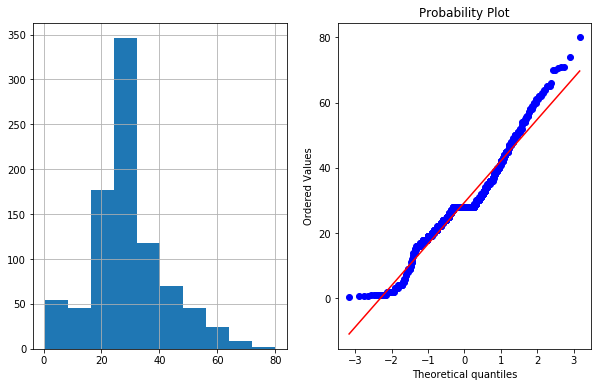

In [89]:
plot_data(df,"Age")

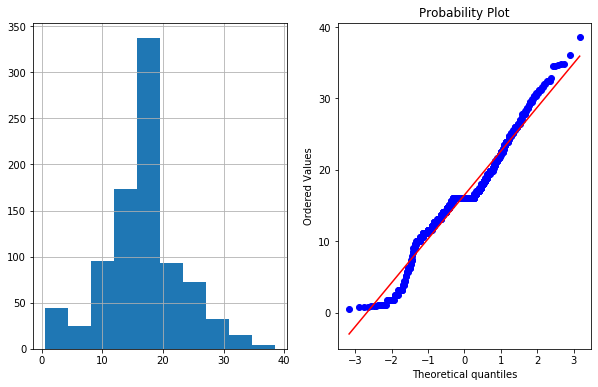

In [90]:
plot_data(df,"Age_exponential")

## d.BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter.
λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [93]:
df["Age_Boxcox"],parameters=stat.boxcox(df["Age"]) # Data Must Be POssitive

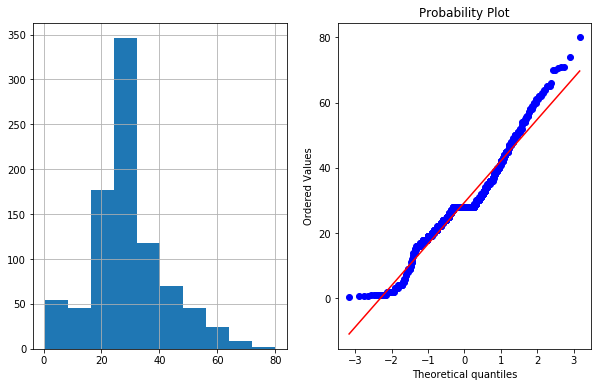

In [94]:
plot_data(df,"Age")

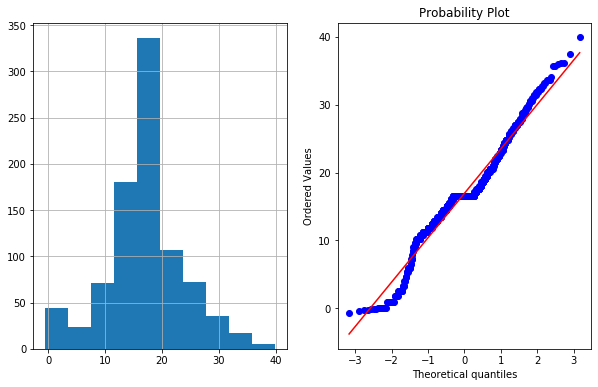

In [95]:
plot_data(df,"Age_Boxcox")

In [96]:
df["Fare_boxcox"],parameters=stat.boxcox(df["Fare"].replace(0,1))

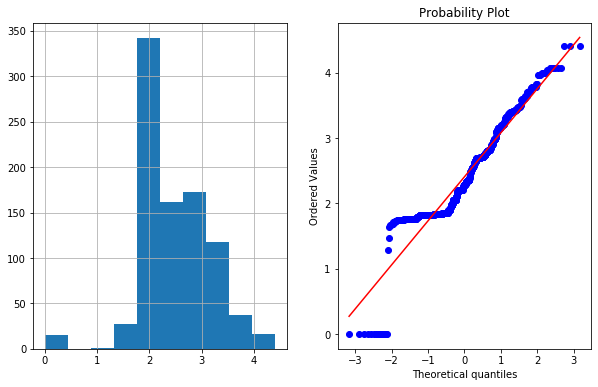

In [97]:
plot_data(df,"Fare_boxcox")

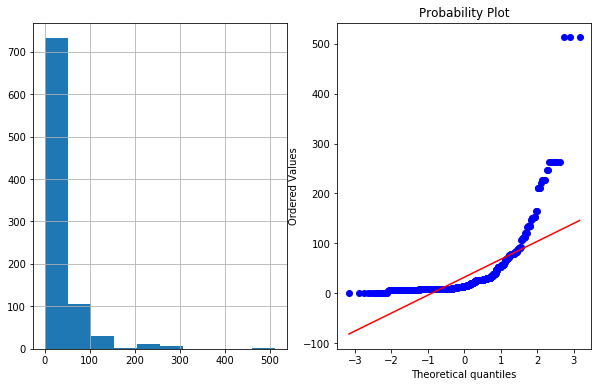

In [99]:
plot_data(df,"Fare")

In [111]:
def Guassian_Transformation(df,feature): 
    df[feature+"_log"] = np.log(df[feature].replace(0,1))
    df[feature+"_square"] = df[feature]**(1/2)
    df[feature+"_reciprocal"]=1/df[feature].replace(0,1)
    df[feature+"_exponential"] = df[feature]**(1/1.2)
    df[feature+"_boxcox"],parameters=stat.boxcox(df[feature].replace(0,1))
    def plot_data(df,feature):
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        df[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(df[feature],dist='norm',plot=pylab)
        plt.title(feature)
        plt.show()
    plot_data(df,feature)
    for i in df[[feature+"_log",feature+"_square",feature+"_reciprocal",feature+"_reciprocal",feature+"_exponential",feature+"_boxcox"]]:
        plot_data(df,i)

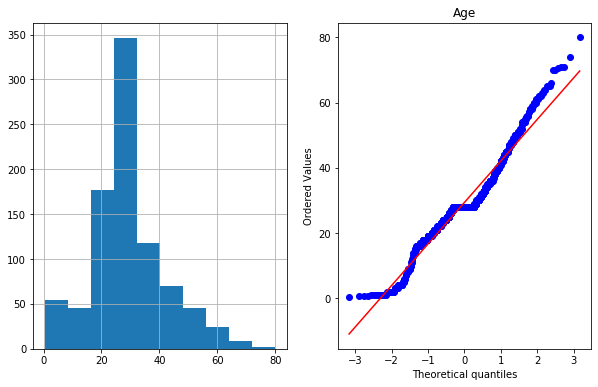

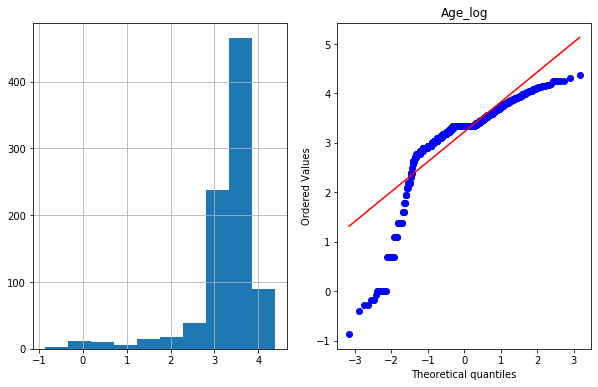

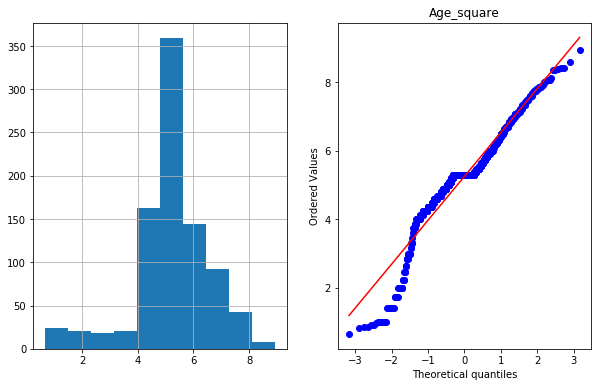

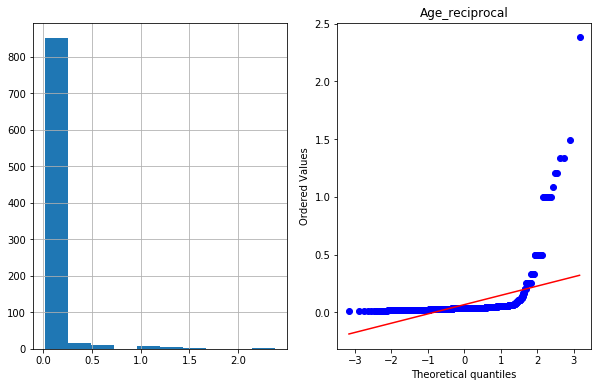

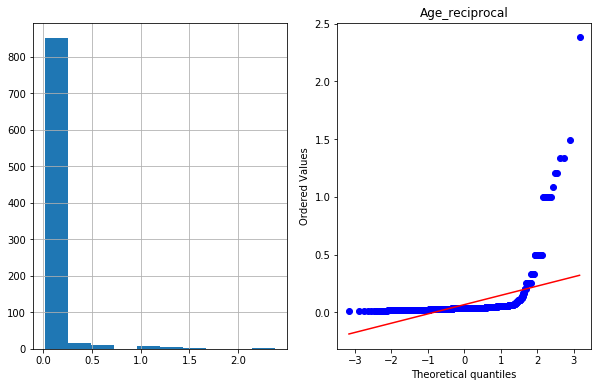

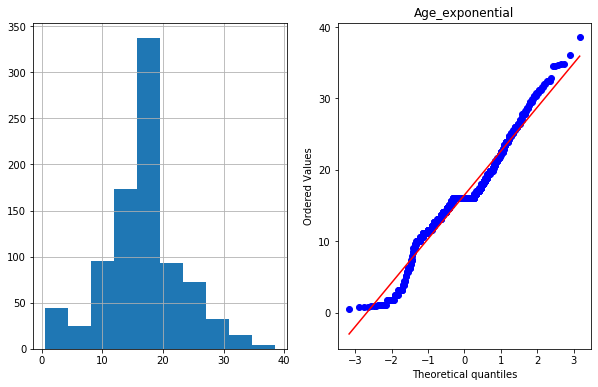

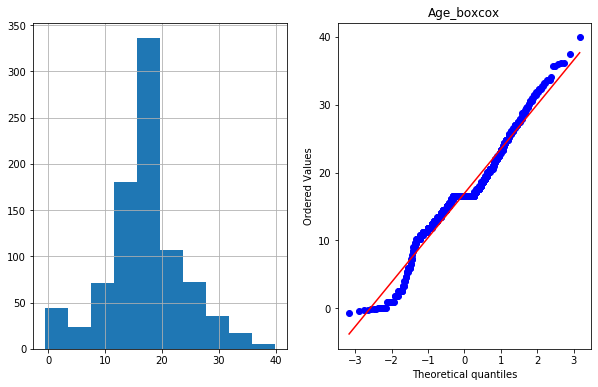

In [121]:
Guassian_Transformation(df,"Age")

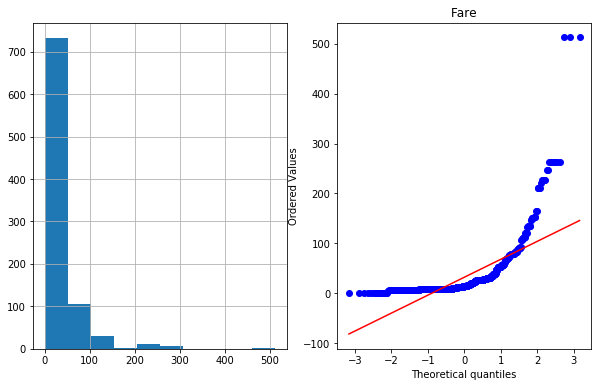

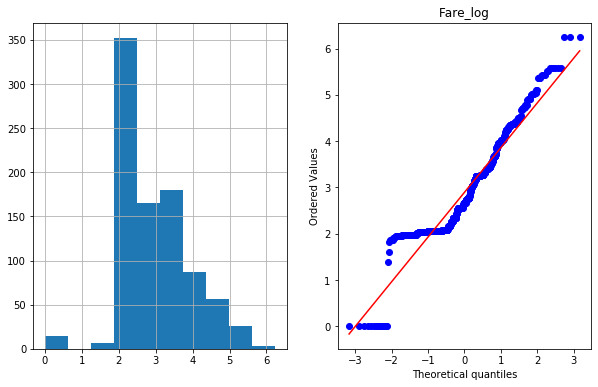

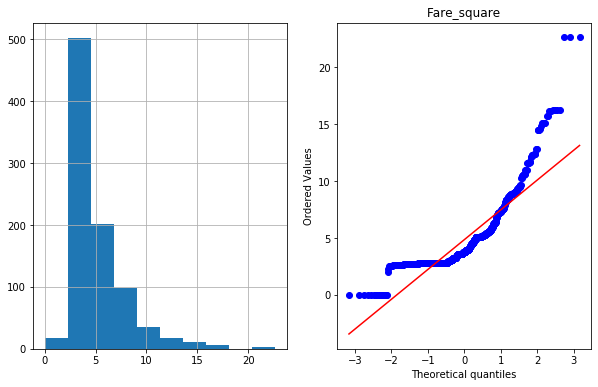

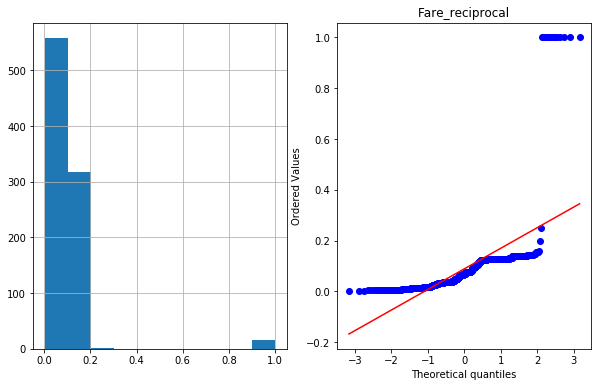

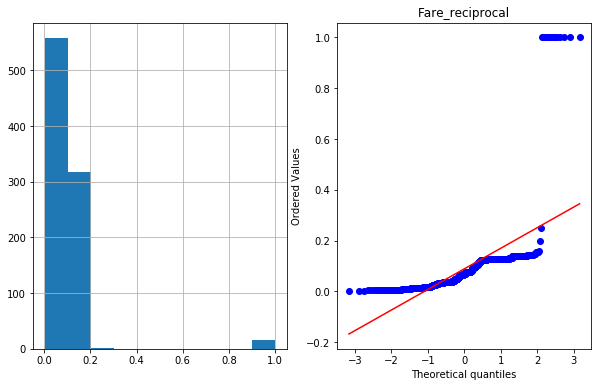

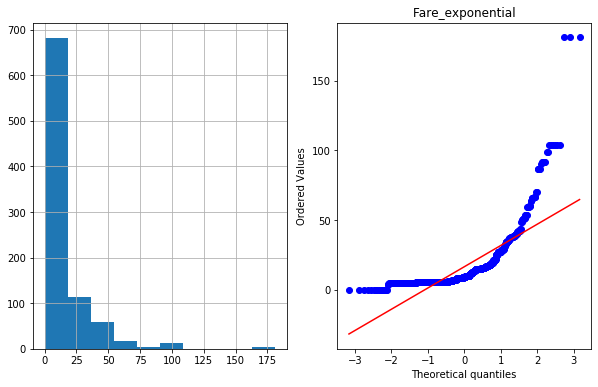

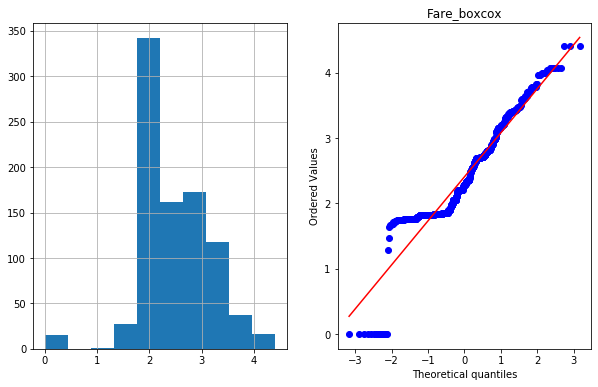

In [122]:
Guassian_Transformation(df,"Fare")

In [123]:
df.head()

,Survived,Age,Fare,Age_log,Age_square,Age_reciprocal,Age_exponential,Age_boxcox,Fare_log,Fare_square,Fare_reciprocal,Fare_exponential,Fare_boxcox
0,0,22.0,7.2500,3.091042,4.690416,0.045455,13.142729,13.468119,1.981001,2.692582,0.137931,5.211327,1.764857
1,1,38.0,71.2833,3.637586,6.164414,0.026316,20.724608,21.498728,4.266662,8.442944,0.014029,35.007129,3.345880
2,1,26.0,7.9250,3.258097,5.099020,0.038462,15.105825,15.563417,2.070022,2.815138,0.126183,5.612625,1.834815
3,1,35.0,53.1000,3.555348,5.916080,0.028571,19.351889,20.056110,3.972177,7.286975,0.018832,27.389163,3.165482
4,0,35.0,8.0500,3.555348,5.916080,0.028571,19.351889,20.056110,2.085672,2.837252,0.124224,5.686302,1.847037


In [124]:
df=df[["Survived","Age_boxcox","Fare_boxcox"]]

In [125]:
df.head()

,Survived,Age_boxcox,Fare_boxcox
0,0,13.468119,1.764857
1,1,21.498728,3.345880
2,1,15.563417,1.834815
3,1,20.056110,3.165482
4,0,20.056110,1.847037
